In [10]:
import os
import sys
import warnings
warnings.simplefilter(action="ignore")
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv("C:\\College\\Semester 6\\NLP\\AirPassengers.csv")
df.columns = ["Month", "Passengers"]
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

print("\n=== First 5 Rows ===")
print(df.head())


=== First 5 Rows ===
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [11]:
print("\n=== Dataset Info ===")
print(df.dtypes)


=== Dataset Info ===
Passengers    int64
dtype: object


In [12]:
result = adfuller(df["Passengers"])
print("\n=== ADF Test (Original Series) ===")
print("ADF Statistic:", result[0])
print("p-value:", result[1])


=== ADF Test (Original Series) ===
ADF Statistic: 0.8153688792060352
p-value: 0.9918802434376408


In [13]:
diff_data = df["Passengers"].diff().dropna()

result_diff = adfuller(diff_data)
print("\n=== ADF Test (Differenced Series) ===")
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])


=== ADF Test (Differenced Series) ===
ADF Statistic: -2.8292668241699945
p-value: 0.05421329028382621


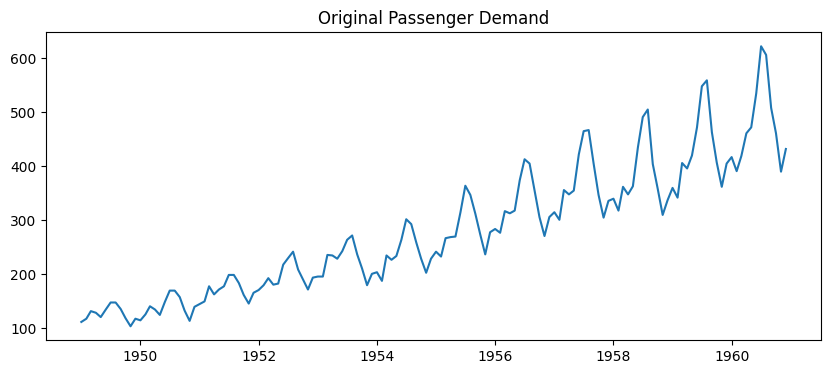

In [14]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df["Passengers"])
plt.title("Original Passenger Demand")
plt.show()

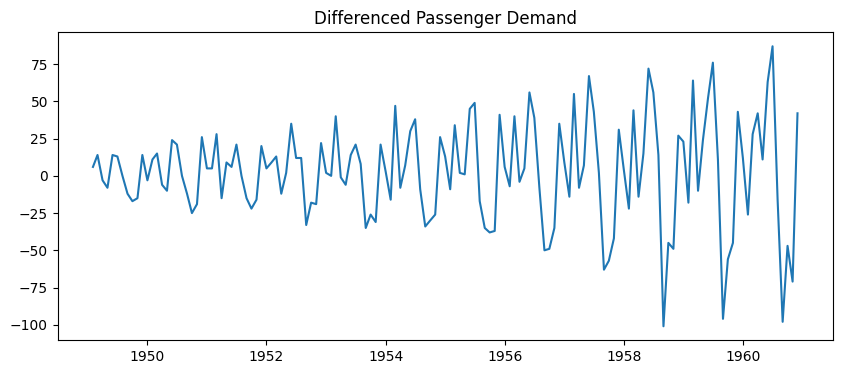

In [15]:
plt.figure(figsize=(10,4))
plt.plot(diff_data.index, diff_data)
plt.title("Differenced Passenger Demand")
plt.show()

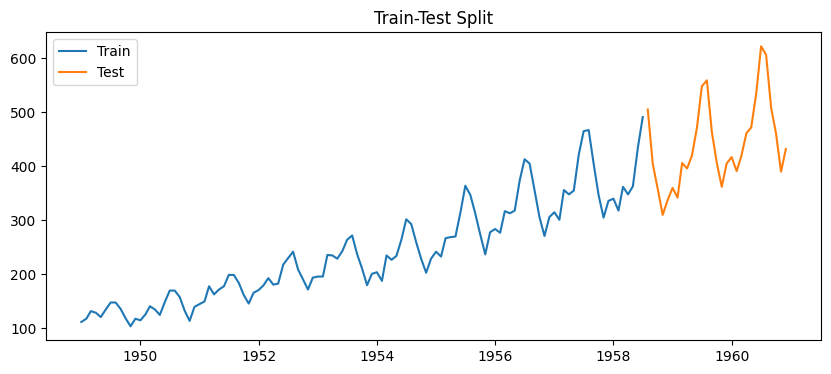

In [16]:
train_size = int(len(df) * 0.8)
train = df["Passengers"][:train_size]
test = df["Passengers"][train_size:]

plt.figure(figsize=(10,4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.legend()
plt.title("Train-Test Split")
plt.show()

In [17]:
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

print("\n=== Evaluation Metrics ===")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))


=== Evaluation Metrics ===
MAE: 63.55
RMSE: 82.51


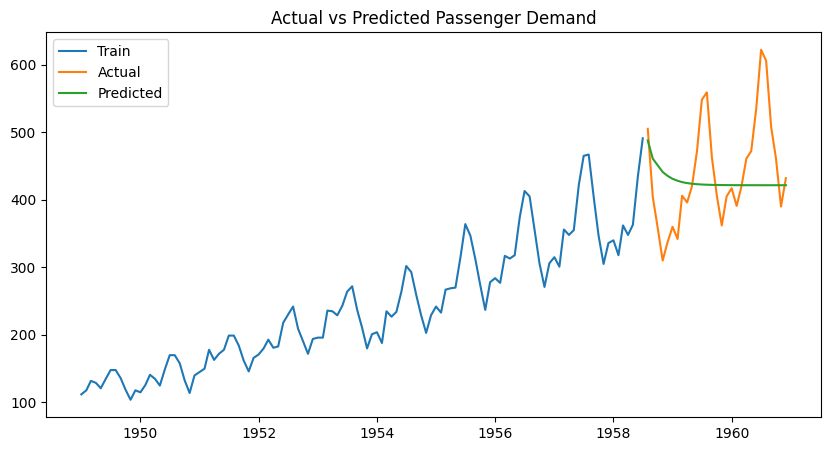

In [18]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, predictions, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Passenger Demand")
plt.show()

In [19]:
future_steps = 12
future_forecast = model_fit.forecast(steps=future_steps)

print("\n=== Next 12 Months Forecast ===")
print(future_forecast)


=== Next 12 Months Forecast ===
1958-08-01    487.825560
1958-09-01    460.796800
1958-10-01    451.130922
1958-11-01    441.145635
1958-12-01    435.433346
1959-01-01    431.042077
1959-02-01    428.161471
1959-03-01    426.109439
1959-04-01    424.710071
1959-05-01    423.733689
1959-06-01    423.060606
1959-07-01    422.593654
Freq: MS, Name: predicted_mean, dtype: float64


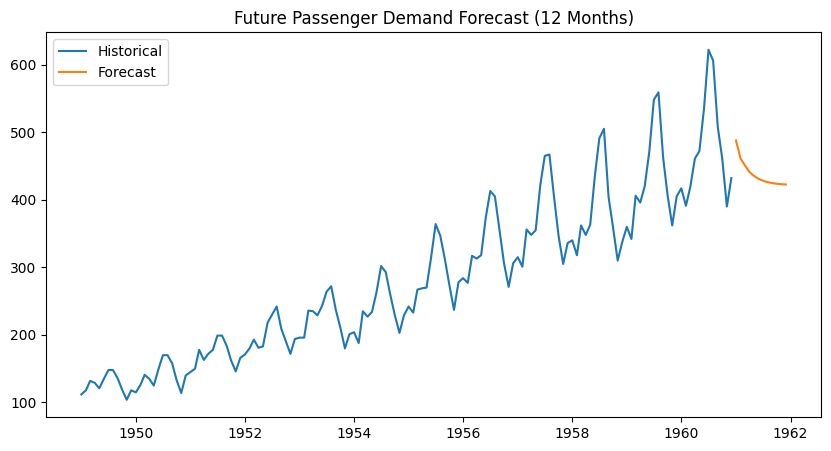

In [20]:
future_index = pd.date_range(df.index[-1] + pd.offsets.MonthBegin(), periods=future_steps, freq="MS")

plt.figure(figsize=(10,5))
plt.plot(df.index, df["Passengers"], label="Historical")
plt.plot(future_index, future_forecast, label="Forecast")
plt.legend()
plt.title("Future Passenger Demand Forecast (12 Months)")
plt.show()